### Notebook intended to view KMZ files containing G-LiHT data collection paths without needing Google Earth. Based on [this medium article.](https://medium.com/@nouhailadraidar1/a-beginners-guide-to-handling-geospatial-data-using-python-79c20106167e)

Import packages

In [2]:
import geopandas as gpd
import os 
import pandas as pd 
import zipfile 
import fiona 
from bs4 import BeautifulSoup 

A KMZ file is a zipped version of a KML file, so we will want to extract all the files contained within the KMZ. 

In [3]:
# Specify the path to our KMZ file
#kmz_file_path = "/explore/nobackup/people/sking11/Bruce_Alaska_Data/AK_20180703_Kenai_FHP1_tiles.kmz"
kmz_file_path1 = "/explore/nobackup/people/sking11/Bruce_Alaska_Data/AK_20180703_Kenai_FHP1_tiles.kmz"
kmz_file_path2 = "/explore/nobackup/people/sking11/Bruce_Alaska_Data/AK_20180703_Kenai_FHP2_tiles.kmz"
kmz_file_path3 = "/explore/nobackup/people/sking11/Bruce_Alaska_Data/AK_20180703_Kenai_FHP3_tiles.kmz"
kmz_file_path4 = "/explore/nobackup/people/sking11/Bruce_Alaska_Data/AK_20180703_Kenai_FHP4_tiles.kmz"

# Specify the directory where we want to extract the KML file (same directory as the KMZ file)
extraction_dir1 = os.path.dirname("/explore/nobackup/people/sking11/Bruce_Alaska_Data/AK_20180703_Kenai_FHP1_tiles.kmz")
extraction_dir2 = os.path.dirname("/explore/nobackup/people/sking11/Bruce_Alaska_Data/AK_20180703_Kenai_FHP2_tiles.kmz")
extraction_dir3 = os.path.dirname("/explore/nobackup/people/sking11/Bruce_Alaska_Data/AK_20180703_Kenai_FHP3_tiles.kmz")
extraction_dir4 = os.path.dirname("/explore/nobackup/people/sking11/Bruce_Alaska_Data/AK_20180703_Kenai_FHP4_tiles.kmz")

# Open the KMZ file and extract its contents
with zipfile.ZipFile(kmz_file_path4, "r") as kmz:
    kmz.extractall(extraction_dir4)

We need to enable KML support as it is disabled by default, or else we will face the unsupported Driver Error.

In [4]:
#enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['libkml'] = 'rw' 
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'

Specify the path to the extracted KML files of interest and put them all in a list

In [5]:
# Specify the path to the extracted KML file
kml_file_path1 = "/explore/nobackup/people/sking11/Bruce_Alaska_Data/raid4/gliht/2018_products/AK/20180703_fhp1/kml/tiles/"  
fp_eq1 = kml_file_path1 + 'AK_20180703_Kenai_FHP1_tiles' + '.kml'

kml_file_path2 = "/explore/nobackup/people/sking11/Bruce_Alaska_Data/raid4/gliht/2018_products/AK/20180703_fhp2/kml/tiles/"  
fp_eq2 = kml_file_path2 + "AK_20180703_Kenai_FHP2_tiles" + '.kml'

kml_file_path3 = "/explore/nobackup/people/sking11/Bruce_Alaska_Data/raid4/gliht/2018_products/AK/20180703_fhp3/kml/tiles/"  
fp_eq3 = kml_file_path3 + "AK_20180703_Kenai_FHP3_tiles" + '.kml'

kml_file_path4 = "/explore/nobackup/people/sking11/Bruce_Alaska_Data/raid4/gliht/2018_products/AK/20180703_fhp4/kml/tiles/"  
fp_eq4 = kml_file_path4 + "AK_20180703_Kenai_FHP4_tiles" + '.kml'

file_list = [fp_eq1, fp_eq2, fp_eq3, fp_eq4]

Combine all of the KML files into one geodataframe (gdf) so we can view them all at once. 

In [6]:
# Use the fiona library to list all the layers within a KML file
gdf_list = []
for file_path in file_list:
    for layer in fiona.listlayers(file_path):    
        # Use geopandas to read and load the data from that specific layer within the KML file
        gdf = gpd.read_file(file_path, driver='LIBKML', layer=layer)
        # Append the GeoDataFrame to the list
        gdf_list.append(gdf)

# Concatenate all these individual GeoDataFrames into a single GeoDataFrame called gdf
gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

# View the resulting GeoDataFrame
print(gdf)

      Name Description                                           geometry
0     l0s0              GEOMETRYCOLLECTION Z (POINT Z (-150.80063 60.5...
1     l0s1              GEOMETRYCOLLECTION Z (POINT Z (-150.79719 60.5...
2    l0s10              GEOMETRYCOLLECTION Z (POINT Z (-150.81263 60.6...
3    l0s11              GEOMETRYCOLLECTION Z (POINT Z (-150.82175 60.6...
4    l0s12              GEOMETRYCOLLECTION Z (POINT Z (-150.82294 60.6...
..     ...         ...                                                ...
97    l0s5              GEOMETRYCOLLECTION Z (POINT Z (-150.16977 61.5...
98    l0s6              GEOMETRYCOLLECTION Z (POINT Z (-150.16618 61.5...
99    l0s7              GEOMETRYCOLLECTION Z (POINT Z (-150.16245 61.5...
100   l0s8              GEOMETRYCOLLECTION Z (POINT Z (-150.15849 61.5...
101   l0s9              GEOMETRYCOLLECTION Z (POINT Z (-150.15476 61.5...

[102 rows x 3 columns]


Look at the gdf we made. 

In [15]:
gdf.head()

,Name,Description,geometry
0,l0s0,,GEOMETRYCOLLECTION Z (POINT Z (-150.80063 60.5...
1,l0s1,,GEOMETRYCOLLECTION Z (POINT Z (-150.79719 60.5...
2,l0s10,,GEOMETRYCOLLECTION Z (POINT Z (-150.81263 60.6...
3,l0s11,,GEOMETRYCOLLECTION Z (POINT Z (-150.82175 60.6...
4,l0s12,,GEOMETRYCOLLECTION Z (POINT Z (-150.82294 60.6...


Plot the gdf (plot output will be simple)

<AxesSubplot: >

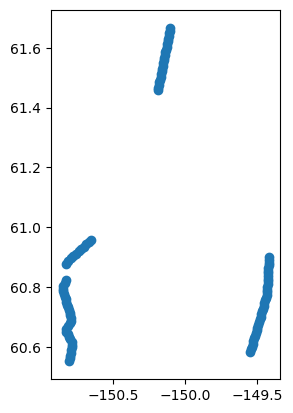

In [7]:
gdf.plot()

Plot the gdf against an ArcGIS world map. 

In [8]:
gdf.explore(tiles='https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr="arcgis")

/panfs/ccds02/app/modules/jupyter/ilab/pytorch-kernel/lib/python3.9/site-packages/folium/features.py:907: UserWarning: GeoJsonTooltip is not configured to render for GeoJson GeometryCollection geometries. Please consider reworking these features: [{'Name': 'l0s0', 'Description': ''}, {'Name': 'l0s1', 'Description': ''}, {'Name': 'l0s10', 'Description': ''}, {'Name': 'l0s11', 'Description': ''}, {'Name': 'l0s12', 'Description': ''}, {'Name': 'l0s13', 'Description': ''}, {'Name': 'l0s14', 'Description': ''}, {'Name': 'l0s15', 'Description': ''}, {'Name': 'l0s16', 'Description': ''}, {'Name': 'l0s17', 'Description': ''}, {'Name': 'l0s18', 'Description': ''}, {'Name': 'l0s19', 'Description': ''}, {'Name': 'l0s2', 'Description': ''}, {'Name': 'l0s20', 'Description': ''}, {'Name': 'l0s21', 'Description': ''}, {'Name': 'l0s22', 'Description': ''}, {'Name': 'l0s23', 'Description': ''}, {'Name': 'l0s24', 'Description': ''}, {'Name': 'l0s25', 'Description': ''}, {'Name': 'l0s26', 'Description': 